In [1]:
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics

In [5]:
test = pd.read_csv('D:/Adarsh_Laptop/studetmater/4b699168-4-here_dataset/test.csv',index_col=False)
train = pd.read_csv('D:/Adarsh_Laptop/studetmater/4b699168-4-here_dataset/train.csv',index_col=False)
test.head()


,Id,DetectedCamera,AngleOfSign,SignAspectRatio,SignWidth,SignHeight
0,2c9180975a056a64015a1e10d3f270fe,Right,67,0.63,107,169
1,2c9180975a056a64015a1de4deb16bdc,Front,16,0.88,61,69
2,2c9180975a056a64015a1e0e70ea70ce,Right,44,1.15,232,202
3,2c9180975a056a64015a1dfed0c46ec6,Right,50,1.10,137,125
4,2c9180975a056a64015a1dfed0c46ec7,Front,30,0.95,99,104


In [9]:
X_test=test[['AngleOfSign','SignAspectRatio','SignAspectRatio','SignHeight']]
Y_target = test['DetectedCamera']
X_train=train[['AngleOfSign','SignAspectRatio','SignAspectRatio','SignHeight']]
Y_train=train['DetectedCamera']
lr = LabelEncoder()
Y_target=lr.fit_transform(Y_target.astype('str'))
Y_train=lr.fit_transform(Y_train.astype('str'))

In [94]:
Y_target = test.DetectedCamera
Y_target=lr.fit_transform(Y_target.astype('str'))

In [95]:
knn = KNeighborsClassifier(n_neighbors=21,weights='uniform')
knn.fit(X_train,Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=21, p=2,
           weights='uniform')

In [101]:
pred = knn.predict(X_test)
lr.inverse_transform(pred)

array(['Right', 'Front', 'Right', ..., 'Rear', 'Left', 'Rear'], dtype=object)

In [106]:
print Y_target[70:100]
print pred[70:100]

[0 1 0 2 0 0 0 3 0 0 0 1 0 2 3 2 2 3 3 2 2 1 3 3 0 2 3 3 3 1]
[0 1 0 2 0 0 0 3 0 0 0 1 0 2 3 2 2 3 3 2 2 1 3 3 0 2 3 3 3 1]


In [102]:
metrics.accuracy_score(Y_target,pred)

0.95756709544227414

In [75]:
pred_prob = knn.predict_proba(X_test)
print pred_prob

[[ 0.          0.          0.          1.        ]
 [ 1.          0.          0.          0.        ]
 [ 0.33333333  0.          0.          0.66666667]
 ..., 
 [ 0.          0.          1.          0.        ]
 [ 0.          0.95238095  0.04761905  0.        ]
 [ 0.          0.          1.          0.        ]]


In [108]:
from sklearn.metrics import log_loss

log_loss(Y_target,pred_prob, eps=1e-15)

0.17222635429089347

In [104]:
zip(knn.classes_,pred_prob[2])

[(0, 0.33333333333333331), (1, 0.0), (2, 0.0), (3, 0.66666666666666663)]

In [17]:
import matplotlib.pyplot as plt


In [18]:
k_range= range(1,50)
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,Y_train)
    scores.append(metrics.accuracy_score(Y_target,knn.predict(X_test)))

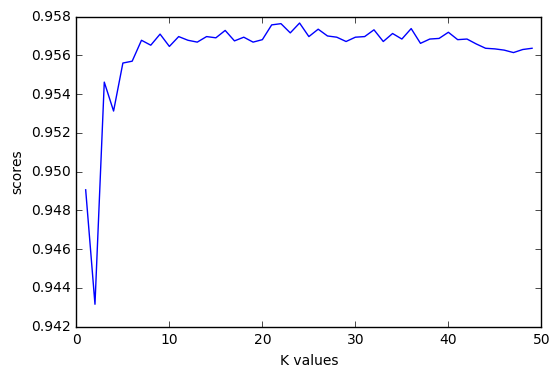

In [20]:
%matplotlib inline
plt.plot(k_range,scores)
plt.xlabel("K values")
plt.ylabel("scores")

In [ ]:
train.hist()
plt.show()

In [21]:
from sklearn.cross_validation import cross_val_score
k_range= range(1,50)
scores_list = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    
    knn.fit(X_train,Y_train)
    scores_list.append(cross_val_score(knn,X_train,Y_train,cv=10,scoring='accuracy').mean())

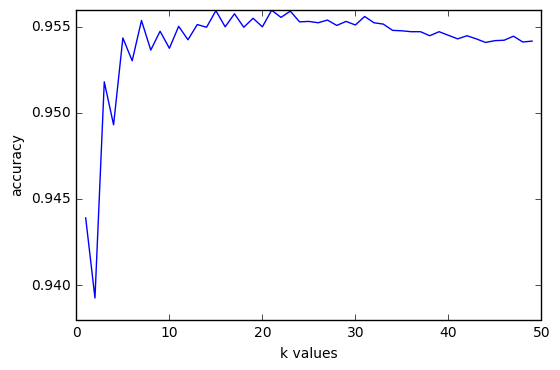

In [25]:
import matplotlib.pyplot as plt
plt.plot(k_range,scores_list)
plt.xlabel('k values')
plt.ylabel('accuracy')

In [35]:
from sklearn.grid_search import GridSearchCV

In [67]:
weight_options = ['uniform', 'distance']
param_grid=dict(n_neighbors=k_range, weights=weight_options)

print param_grid

{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49], 'weights': ['uniform', 'distance']}


In [68]:
grid = GridSearchCV(knn,param_grid,cv=10,scoring='accuracy')
print grid

GridSearchCV(cv=10, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=21, p=2,
           weights='uniform'),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49], 'weights': ['uniform', 'distance']},
       pre_dispatch='2*n_jobs', refit=True, scoring='accuracy', verbose=0)


In [69]:
grid.fit(X_train,Y_train)

GridSearchCV(cv=10, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=21, p=2,
           weights='uniform'),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49], 'weights': ['uniform', 'distance']},
       pre_dispatch='2*n_jobs', refit=True, scoring='accuracy', verbose=0)

In [109]:
print(grid.grid_scores_[0].parameters)
print(grid.grid_scores_[0].cv_validation_scores)
print(grid.grid_scores_[0].mean_validation_score)

{'n_neighbors': 1, 'weights': 'uniform'}
[ 0.92103896  0.95687191  0.9495973   0.94388153  0.94673941  0.9397246
  0.9495842   0.93944906  0.95035092  0.94177281]
0.943900220865


In [47]:
print grid.best_score_
print grid.best_params_
print grid.best_estimator_

0.955956866312
{'n_neighbors': 21}
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=21, p=2,
           weights='uniform')


In [78]:
from sklearn.grid_search import RandomizedSearchCV
rand = RandomizedSearchCV(knn, param_grid, cv=10, scoring='accuracy', n_iter=10, random_state=5)
rand.fit(X_train,Y_train)
rand.grid_scores_

[mean: 0.95450, std: 0.01030, params: {'n_neighbors': 40, 'weights': 'uniform'},
 mean: 0.95406, std: 0.00971, params: {'n_neighbors': 31, 'weights': 'distance'},
 mean: 0.95474, std: 0.01011, params: {'n_neighbors': 9, 'weights': 'uniform'},
 mean: 0.95403, std: 0.00967, params: {'n_neighbors': 37, 'weights': 'distance'},
 mean: 0.95435, std: 0.00978, params: {'n_neighbors': 5, 'weights': 'uniform'},
 mean: 0.95523, std: 0.01042, params: {'n_neighbors': 32, 'weights': 'uniform'},
 mean: 0.95255, std: 0.00957, params: {'n_neighbors': 14, 'weights': 'distance'},
 mean: 0.95500, std: 0.00954, params: {'n_neighbors': 16, 'weights': 'uniform'},
 mean: 0.95429, std: 0.00999, params: {'n_neighbors': 41, 'weights': 'uniform'},
 mean: 0.94918, std: 0.00917, params: {'n_neighbors': 4, 'weights': 'distance'}]

In [79]:
print(rand.best_score_)
print(rand.best_params_)

0.955229310121
{'n_neighbors': 32, 'weights': 'uniform'}


In [85]:
from sklearn.linear_model import LogisticRegression
logic = LogisticRegression()

In [87]:
logic.fit(X_train,Y_train)
prob_logic=logic.predict(X_test)
metrics.accuracy_score(Y_target,prob_logic)

0.77227251071939018

In [113]:
log_loss(Y_target,logic.predict_proba(X_test), eps=1e-15)

0.69826649715777367

In [92]:
type(pred_prob)

numpy.ndarray

In [53]:
lr.inverse_transform([0, 1, 2,3])

array(['Front', 'Left', 'Rear', 'Right'], dtype=object)

In [54]:
df1 = pd.DataFrame(test['Id'],columns=['Id'])


In [55]:
df2 = pd.DataFrame(pred_prob,columns=lr.inverse_transform([0, 1, 2,3]))


In [56]:
pd.concat([df1,df2],axis=1)

,Id,Front,Left,Rear,Right
0,2c9180975a056a64015a1e10d3f270fe,0.000000,0.000000,0.000000,1.000000
1,2c9180975a056a64015a1de4deb16bdc,1.000000,0.000000,0.000000,0.000000
2,2c9180975a056a64015a1e0e70ea70ce,0.333333,0.000000,0.000000,0.666667
3,2c9180975a056a64015a1dfed0c46ec6,0.000000,0.000000,0.000000,1.000000
4,2c9180975a056a64015a1dfed0c46ec7,1.000000,0.000000,0.000000,0.000000
5,2c9180975a056a64015a1e44ba4377f8,0.000000,0.000000,0.333333,0.666667
6,2c9180975a056a64015a1e010c8f6ee1,1.000000,0.000000,0.000000,0.000000
7,2c9180975a056a64015a1e1db63072aa,0.000000,0.000000,0.000000,1.000000
8,2c9180975a056a64015a1e1db63072a8,0.000000,0.000000,1.000000,0.000000
9,2c9180975a056a64015a1e2354f5733c,0.000000,0.000000,1.000000,0.000000


In [57]:
output = pd.concat([df1,df2],axis=1)

In [58]:
output.to_csv('D:/hackerEarth_1.csv',index=False)